# (2.1) Basic Terminology

#Roshan Kumar Sahu
#121cs0228

## haberman Flower dataset

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

### Read the Dataset


In [3]:
hb = pd.read_csv("haberman.csv")

### How many data-points and features?

In [4]:
print("Number of rows are :",hb.shape[0],"\nNumber of columns are :",hb.shape[1])

Number of rows are : 306 
Number of columns are : 4


### What are the column names in the dataset?

In [5]:
print(hb.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


### How many data points for each class are present?


In [7]:
df = pd.DataFrame(hb)
grouped = df.groupby(['status'])
print(grouped.count())

        age  year  nodes
status                  
1       225   225    225
2        81    81     81


# (2.2) 2-D Scatter Plot

###2-D scatter plot:
###ALWAYS understand the axis: labels and scale.



###cannot make much sense out it.
###What if we color the points by thier class-label/flower-type.

In [12]:
sns.set_theme()

### 2-D Scatter plot with color-coding for each flower type/class.
### Here 'sns' corresponds to seaborn.

### Notice that the blue points can be easily seperated
### from red and green by drawing a line.
### But red and green data points cannot be easily seperated.
### Can we draw multiple 2-D scatter plots for each combination of features?
### How many cobinations exist? 4C2 = 6.

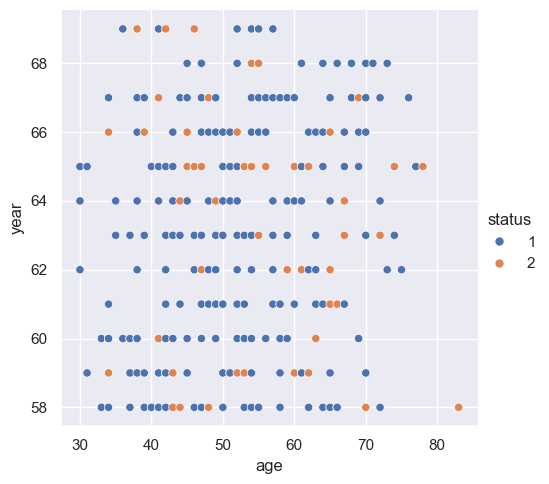

In [15]:

sns.relplot(
    data=df,
    x="age", y="year",hue='status',palette='deep'
)


**Observation(s):**
1. Using sepal_length and sepal_width features, we can distinguish Setosa flowers from others.
2. Seperating Versicolor from Viginica is much harder as they have considerable overlap.

## 3D Scatter plot

https://plot.ly/pandas/3d-scatter-plots/

Needs a lot to mouse interaction to interpret data.

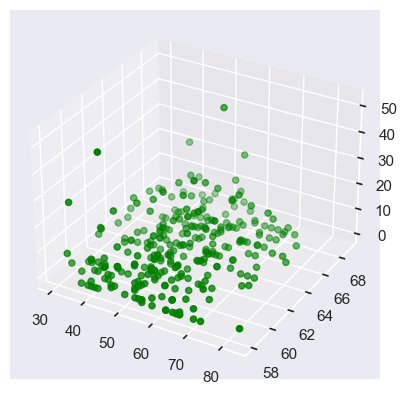

In [30]:
ax = plt.axes(projection="3d")
ax.scatter3D(df['age'],df['year'],df['nodes'], c='green', cmap='cividis');
plt.show()

#  (2.3) Pair-plot

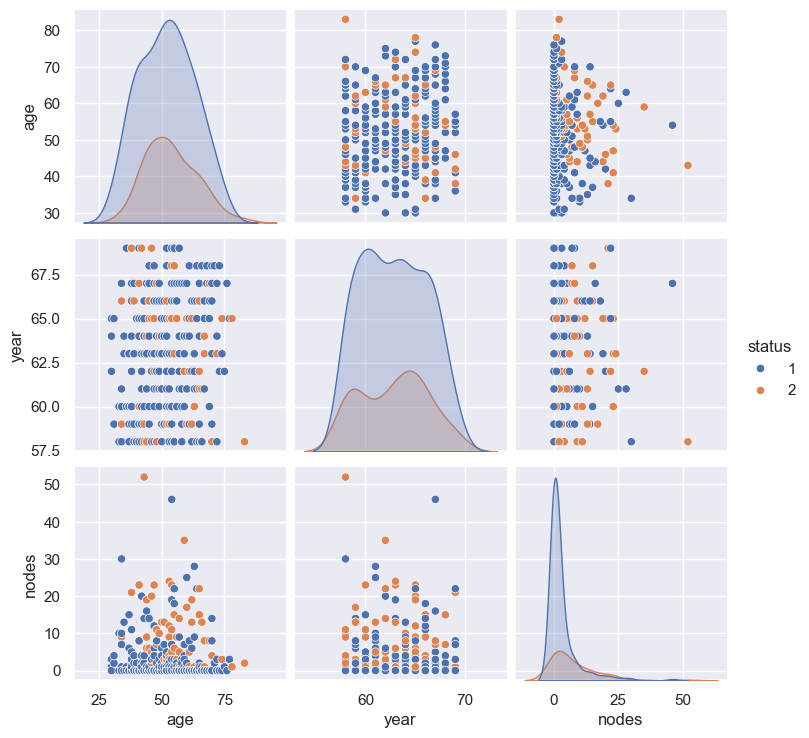

In [50]:
sns.pairplot(data=df, hue="status",palette="deep")
plt.show()

### pairwise scatter plot: Pair-Plot
### Dis-advantages:
###Can be used when number of features are high.
###Cannot visualize higher dimensional patterns in 3-D and 4-D.
###Only possible to view 2D patterns.

### NOTE: the diagnol elements are PDFs for each feature. PDFs are expalined below.

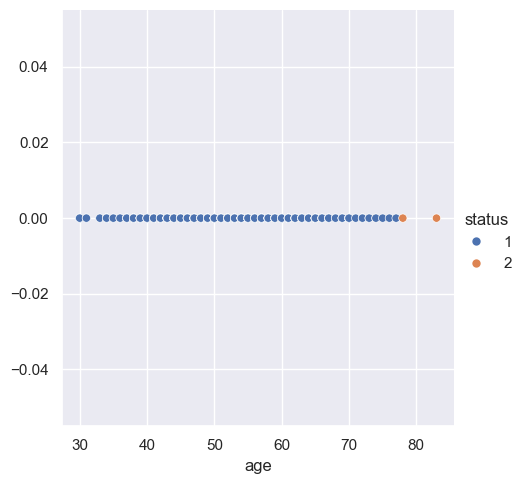

In [26]:
# from pair plot  we found out nodes and year are the best separable

**Observations**
1. petal_length and petal_width are the most useful features to identify various flower types.
2. While Setosa can be easily identified (linearly seperable), Virnica and Versicolor have some overlap (almost linearly seperable).
3. We can find "lines" and "if-else" conditions to build a simple model to classify the flower types.

# (2.4) Histogram, Probability Density Function (PDF), Cumulative Density Function (CDF)

### What about 1-D scatter plot using just one feature?
###1-D scatter plot of petal-length

###Disadvantages of 1-D scatter plot: Very hard to make sense as points
###are overlapping a lot.
###Are there better ways of visualizing 1-D scatter plots? Solution: Histograms and Distribution Plot

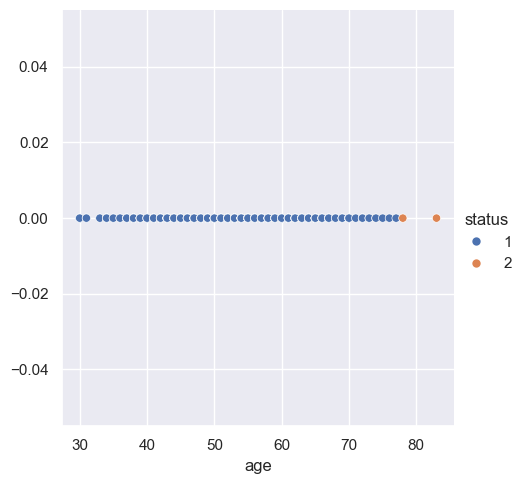

In [33]:

sns.relplot(
    data=df,
    x="age", y=0,hue='status',palette='deep'
)
plt.show()


### Histograms and Probability Density Functions (PDF) using KDE


### Need for Cumulative Distribution Function (CDF)- Blue line-PDF and Orange line-CDF
### CDF always lies between 0-1
### You can build a PDF by drawing a Histogram and then smoothing it
### The cumulative distribution function (CDF) of a real-valued random variable X, or just distribution function of X, evaluated at x, is the probability that X will take a value less than or equal to x
### CDF at a particular point is the Area under the curve of PDF until that point. Hence if you differentiate your CDF you will get ur PDF. If you do integration on your PDF you will get CDF
### We can visually see what percentage of versicolor flowers have a
### petal_length of less than 5?

###lot CDF of petal_length




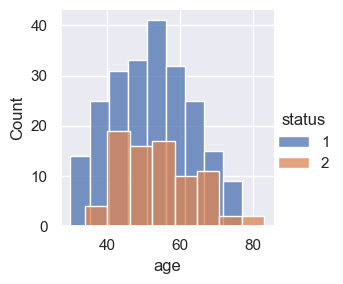

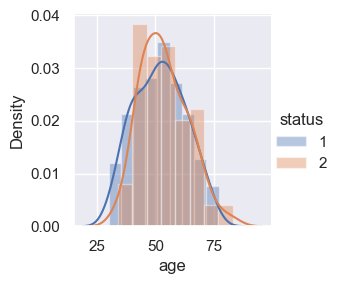

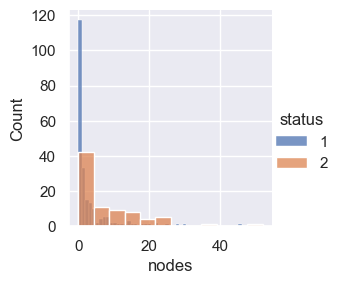

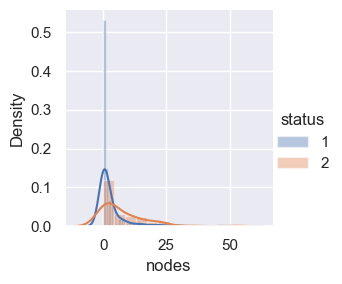

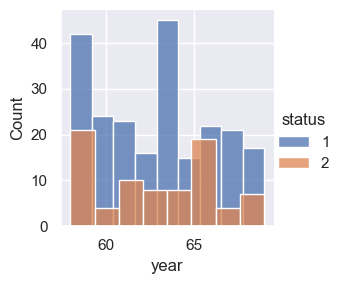

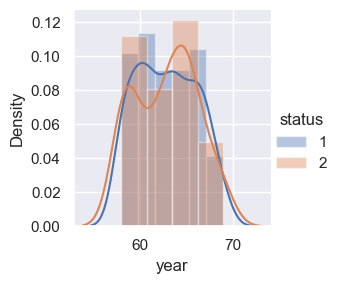

In [37]:
sns.FacetGrid(df, hue="status") \
   .map(sns.histplot, "age") \
   .add_legend();
plt.show();
sns.FacetGrid(df, hue="status") \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();

sns.FacetGrid(df, hue="status") \
   .map(sns.histplot, "nodes") \
   .add_legend();
plt.show();
sns.FacetGrid(df, hue="status") \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.show();

sns.FacetGrid(df, hue="status") \
   .map(sns.histplot, "year") \
   .add_legend();
plt.show();
sns.FacetGrid(df, hue="status") \
   .map(sns.distplot, "year") \
   .add_legend();
plt.show();

### Need for Cumulative Distribution Function (CDF)
### How to construct a CDF?
### How to read a CDF?

###Plot CDF of petal_length



In [44]:
status_1 = df.loc[df["status"] == 1];
status_2 = df.loc[df["status"] == 2];

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


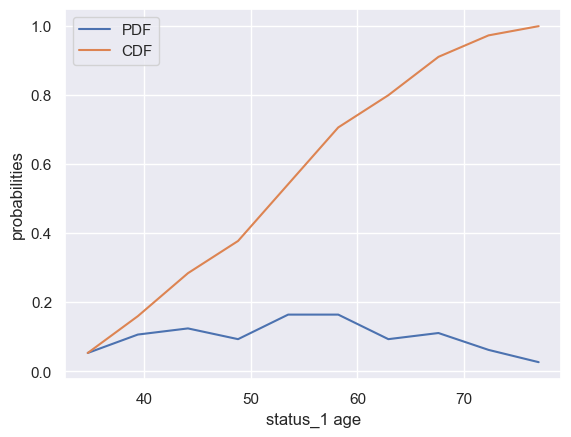

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


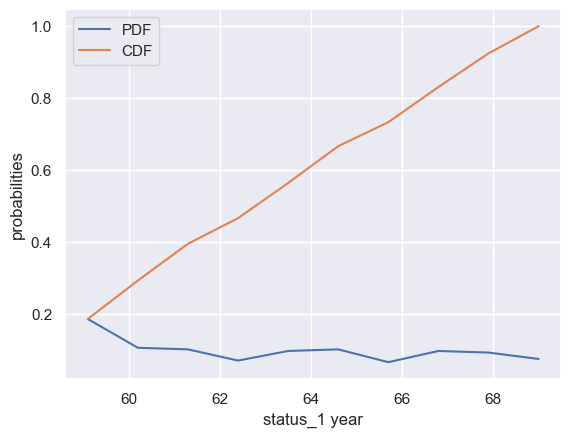

In [47]:
counts, bin_edges = np.histogram(status_1['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF')
plt.plot(bin_edges[1:], cdf,label='CDF')
plt.xlabel('status_1 age')
plt.ylabel('probabilities')
plt.legend()

plt.show();

counts, bin_edges = np.histogram(status_1['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF')
plt.plot(bin_edges[1:], cdf,label='CDF')
plt.xlabel('status_1 year')
plt.ylabel('probabilities')
plt.legend()

plt.show();


### Plots of CDF of petal_length for various types of flowers.

### Misclassification error if you use petal_length only.



[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


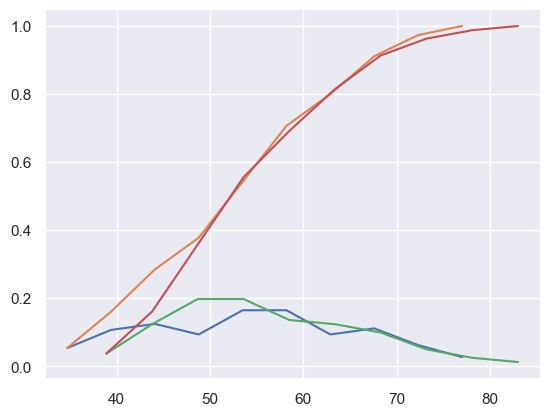

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


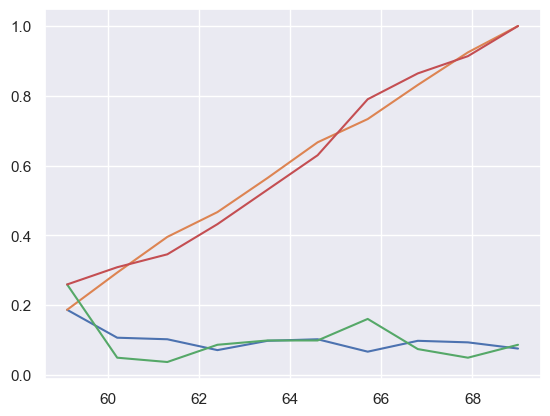

In [51]:
counts, bin_edges = np.histogram(status_1['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='status_1_PDF')
plt.plot(bin_edges[1:], cdf,label='ststaus_2_CDF')


# virginica
counts, bin_edges = np.histogram(status_2['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='status_2_PDF')
plt.plot(bin_edges[1:], cdf,label='status_2_CDF')

plt.show();

counts, bin_edges = np.histogram(status_1['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='status_1_PDF')
plt.plot(bin_edges[1:], cdf,label='ststaus_2_CDF')


# virginica
counts, bin_edges = np.histogram(status_2['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='status_2_PDF')
plt.plot(bin_edges[1:], cdf,label='status_2_CDF')

plt.show();


# (2.5) Mean, Variance and Std-dev

###Mean, Variance, Std-deviation,
###Mean with an outlier.





In [13]:
print("Means:")
print(np.mean(status_1["age"]))
#Mean with an outlier.
print(np.mean(np.append(status_1["age"],50)));
print(np.mean(status_2["age"]))

print("\nStd-dev:");
print(np.std(status_1["age"]))
print(np.std(status_2["age"]))

### (2.6) Median, Percentile, Quantile, Interquartile Range (IQR), Median Absolute Deviation (MAD)

###Median, Quantiles, Percentiles, IQR.

###Median with an outlier



In [58]:


print("Median:")
print(np.median(status_1["age"]))
print(np.median(status_2["age"]))

print("\nQuantile");
print(np.percentile(status_1["age"],np.arange(0, 100, 25)))
print(np.percentile(status_2["age"],np.arange(0, 100, 25)))

print("\n90th percentile")
print(np.percentile(status_1["age"],90))
print(np.percentile(status_2["age"],90))


Median:
52.0
53.0

Quantile
[30. 43. 52. 60.]
[34. 46. 53. 61.]

90th percentile
67.0
67.0


# (2.7) Box plot and Whiskers


###Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.
### The Concept of median, percentile, quantile.
### How to draw the box in the box-plot?
### How to draw whiskers: [no standard way] Could use min and max or use other complex statistical techniques.
### IQR like idea.

###NOTE: IN the plot below, a technique call inter-quartile range is used in plotting the whiskers.
###Whiskers in the plot below donot correposnd to the min and max values.

###Box-plot can be visualized as a PDF on the side-ways.




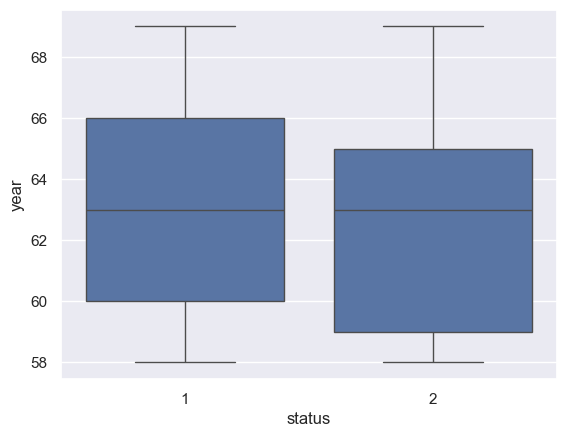

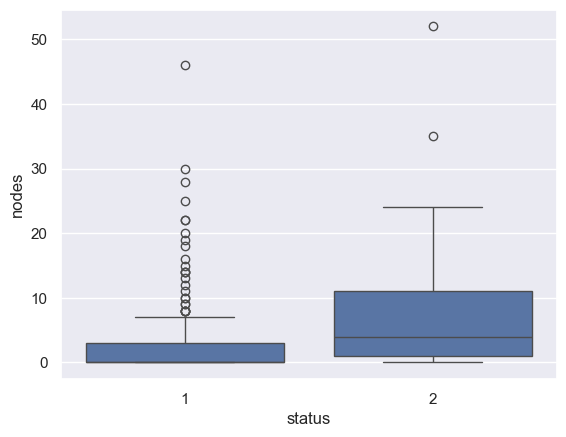

In [62]:
sns.boxplot(x='status',y='year', data=df)
plt.savefig('plot.png')
plt.show()
sns.boxplot(x='status',y='nodes', data=df)
plt.savefig('plot.png')
plt.show()

# (2.8) Violin plots

### A violin plot combines the benefits of the previous two plots and simplifies them

### Denser regions of the data are fatter, and sparser ones thinner in a violin plot


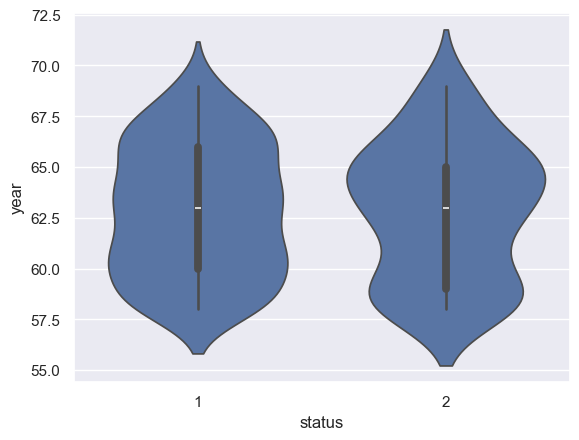

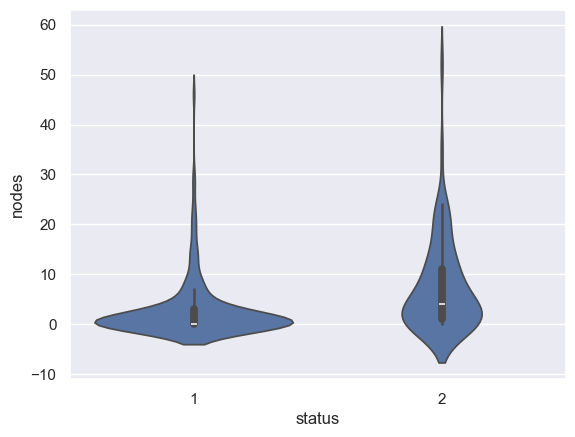

In [63]:
sns.violinplot(x='status',y='year', data=df)
plt.savefig('plot.png')
plt.show()
sns.violinplot(x='status',y='nodes', data=df)
plt.savefig('plot.png')
plt.show()

# (2.9) Exercise:
1. Use the Haberman Cancer Survival dataset given in the current directory
2. Perform a similar anaysis as above on this dataset with the following sections:
* Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful for classification.
* Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.